# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

You should consider upgrading via the '/home/varunc/env/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/varunc/env/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/varunc/env/bin/python3.7 -m pip install --upgrade pip' command.


### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

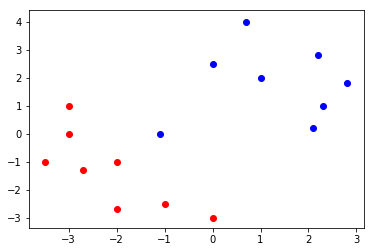

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

**Derivation**:

Distance of any point $x_i$ from the boundary $w^Tx+b=0$ is $\left|\frac{w^Tx_i+b}{||w||}\right|$.

To maximize the margin, thus, we can
1. either set the value of $||w||$ to 1 and maximize $\sum_i |w^Tx_i+b|$ 
2. set the value of margin to be 1, and maximize value of $\frac{1}{||w||}$, which is equivalent of minimizing $\frac{1}{2} w^T w$

For ease, we take the second approach and minimize the value of $\frac{1}{2} w^T w$.

The constraints thus for the given objective, with the hard margin, will be to have all the points satisfying $y_i (w^T x_i +b) \ge 1 \, \forall i$, where $y_i$ is the actual class of the point $x_i$.

In [4]:
n = X.shape[1]
I = np.eye(n)

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)

constraints = [ y[i]*(X[i]@w+b) >=1 for i in range(X.shape[0])]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I)),constraints)
prob.solve()


2.3629489603024565

In [5]:
print("The optimal value is", prob.value)
print("A solution w is")
print(w.value)
print("A solution b is")
print(b.value)


The optimal value is 2.3629489603024565
A solution w is
[-1.73913043 -1.30434783]
A solution b is
[-2.91304348]


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

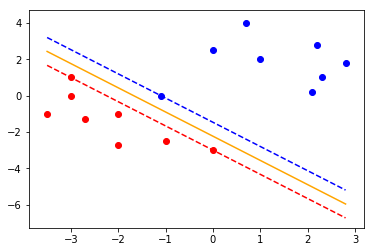

In [6]:
a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

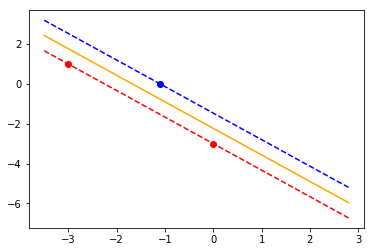

In [7]:
a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')


mask = ((X@w.value+b.value > 1 - 1e-9) & (X@w.value+b.value < 1 + 1e-9 )) | ((X@w.value+b.value > -1 - 1e-9) & (X@w.value+b.value < -1 + 1e-9 ))
plot_points(X[mask],y[mask])


In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [8]:
X = np.vstack([X,[[-4,-10]]])
y = np.append(y,1)

X = np.vstack([X,[[4,4]]])
y = np.append(y,-1)

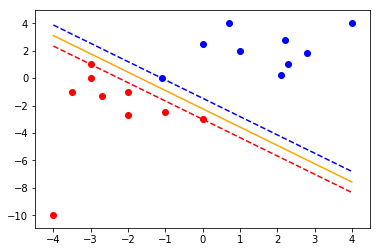

In [9]:
n = X.shape[1]
I = np.eye(n)

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)

constraints = [ y[i]*(X[i]@w+b) >=1 for i in range(X.shape[0])]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I)),constraints)
prob.solve()

a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)
plt.show()

No the boundary doesn't change because they don't become the support vector, nor do they violate the boundary, as they satisfy $y_i (w^T x_i + b) > 1$.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

**Answer**:

Higher values $C$ penalizes the errors more, thus higher values of $C$ allows less and less points inside the margin of the class.

Furthermore, lower values of $C$ lets the margin to be very soft, and thus permits more mistakes, in its pursue to increase the margin size.

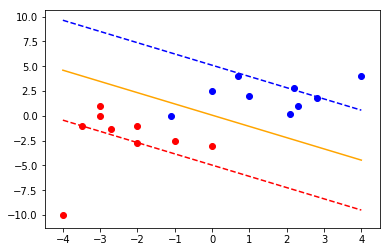

In [10]:
n = X.shape[1]
N = X.shape[0]
I = np.eye(n)
ones_N = np.ones(N)
C = 0.01

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)
err = cp.Variable(N)


constraints = [ y[i]*(X[i]@w+b) >=1-err[i] for i in range(X.shape[0])]
positive_err = [ err[i] >=0 for i in range(N)]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I) +C* (err@ones_N) ) ,constraints+positive_err)
prob.solve()

a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)
plt.show()

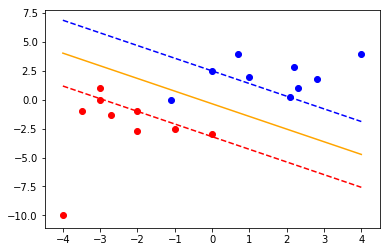

In [11]:
n = X.shape[1]
N = X.shape[0]
I = np.eye(n)
ones_N = np.ones(N)
C = 0.1

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)
err = cp.Variable(N)


constraints = [ y[i]*(X[i]@w+b) >=1-err[i] for i in range(X.shape[0])]
positive_err = [ err[i] >=0 for i in range(N)]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I) +C* (err@ones_N) ) ,constraints+positive_err)
prob.solve()

a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)
plt.show()

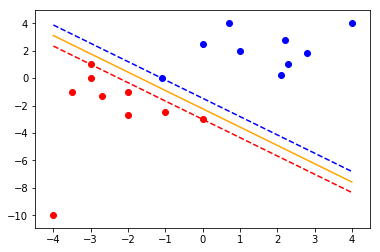

In [12]:
n = X.shape[1]
N = X.shape[0]
I = np.eye(n)
ones_N = np.ones(N)
C = 3

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)
err = cp.Variable(N)


constraints = [ y[i]*(X[i]@w+b) >=1-err[i] for i in range(X.shape[0])]
positive_err = [ err[i] >=0 for i in range(N)]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I) +C* (err@ones_N) ) ,constraints+positive_err)
prob.solve()

a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)
plt.show()

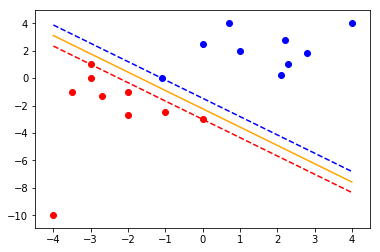

In [13]:
n = X.shape[1]
N = X.shape[0]
I = np.eye(n)
ones_N = np.ones(N)
C = 10

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)
err = cp.Variable(N)


constraints = [ y[i]*(X[i]@w+b) >=1-err[i] for i in range(X.shape[0])]
positive_err = [ err[i] >=0 for i in range(N)]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I) +C* (err@ones_N) ) ,constraints+positive_err)
prob.solve()

a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)
plt.show()

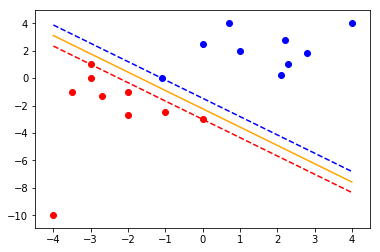

In [14]:
n = X.shape[1]
N = X.shape[0]
I = np.eye(n)
ones_N = np.ones(N)
C = 100

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)
err = cp.Variable(N)


constraints = [ y[i]*(X[i]@w+b) >=1-err[i] for i in range(X.shape[0])]
positive_err = [ err[i] >=0 for i in range(N)]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I) +C* (err@ones_N) ) ,constraints+positive_err)
prob.solve()

a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)
plt.show()

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

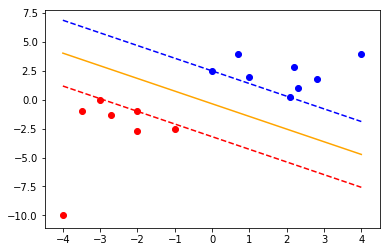

In [15]:
mask = 1-(((X@w.value+b.value > 1 - 1e-9) & (X@w.value+b.value < 1 + 1e-9 )) | ((X@w.value+b.value > -1 - 1e-9) & (X@w.value+b.value < -1 + 1e-9 )))
mask = (mask==1)
X = X[mask]
y = y[mask]

n = X.shape[1]
N = X.shape[0]
I = np.eye(n)
ones_N = np.ones(N)
C = 100

# Define and solve the CVXPY problem.
w = cp.Variable(n)
b = cp.Variable(1)
err = cp.Variable(N)


constraints = [ y[i]*(X[i]@w+b) >=1-err[i] for i in range(X.shape[0])]
positive_err = [ err[i] >=0 for i in range(N)]

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, I) +C* (err@ones_N) ) ,constraints+positive_err)
prob.solve()

a = -w.value[0] / w.value[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (b.value) / w.value[1]
yy_1 = a * xx - (b.value-1) / w.value[1]
yy_2 = a * xx - (b.value+1) / w.value[1]
plt.plot(xx,yy,'orange')
plt.plot(xx,yy_1,'r--')
plt.plot(xx,yy_2,'b--')
plot_points(X,y)
plt.show()

As in case of $C = 100$, the boundary is similar to hard boundary, and thus the margin is supported on the support vectors, deleting support vectors changes margin.

### Subsection 2

In [16]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

You should consider upgrading via the '/home/varunc/env/bin/python3.7 -m pip install --upgrade pip' command.
--2021-03-06 14:06:01--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving proxy.iiit.ac.in (proxy.iiit.ac.in)... 10.4.21.120
Connecting to proxy.iiit.ac.in (proxy.iiit.ac.in)|10.4.21.120|:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  73.2KB/s    in 3m 38s  

2021-03-06 14:09:40 (44.4 KB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-06 14:09:41--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving proxy.iiit.ac.in (proxy.iiit.ac.in)... 10.4.21.120
Connecting to proxy.iiit.ac.in (proxy.iiit.ac.in)|10.4.21.120|:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-la

In [17]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.preprocessing import StandardScaler

In [18]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [19]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [20]:
scaler = StandardScaler()
scaler.fit(np.vstack([images_train,images_test]))

StandardScaler()

In [21]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,r2_score
import seaborn as sns

Accuracy: 0.9663
R squared: 0.9292324271415637
F1 Score: 0.9663
Confusion Matrix:


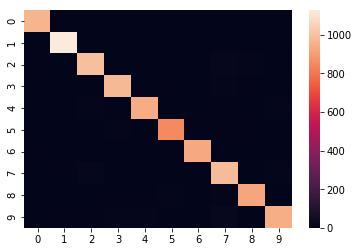

In [22]:
svm = SVC(C = 1, kernel='rbf', gamma='scale')
svm.fit(scaler.transform(images_train),labels_train)

preds = svm.predict(scaler.transform(images_test))

print('Accuracy:',accuracy_score(labels_test,preds))
print('R squared:',r2_score(labels_test,preds))
print('F1 Score:',f1_score(labels_test,preds,average='micro'))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(labels_test,preds))
plt.show()


Gamma=0.001000 C=0.010000
Accuracy: 0.473
R squared: 0.17511275341207588
F1 Score: 0.473
Confusion Matrix:


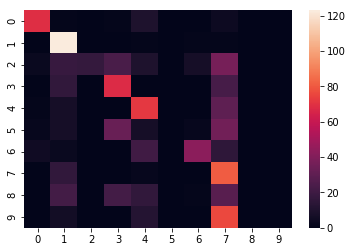

Gamma=0.001000 C=0.100000
Accuracy: 0.859
R squared: 0.7019137706778706
F1 Score: 0.859
Confusion Matrix:


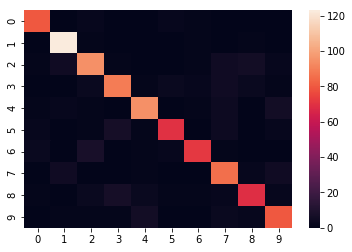

Gamma=0.001000 C=1.000000
Accuracy: 0.916
R squared: 0.8055365856170789
F1 Score: 0.916
Confusion Matrix:


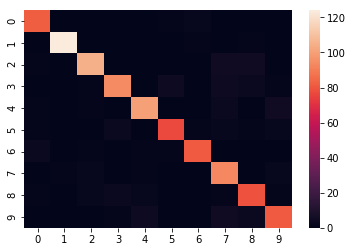

Gamma=0.001000 C=10.000000
Accuracy: 0.932
R squared: 0.8464893148744904
F1 Score: 0.932
Confusion Matrix:


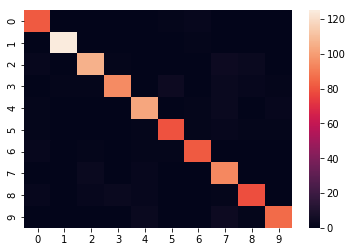

Gamma=0.001000 C=100.000000
Accuracy: 0.933
R squared: 0.842890438667021
F1 Score: 0.933
Confusion Matrix:


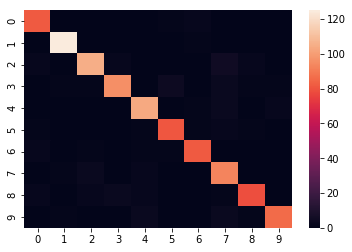

Gamma=0.000100 C=0.010000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


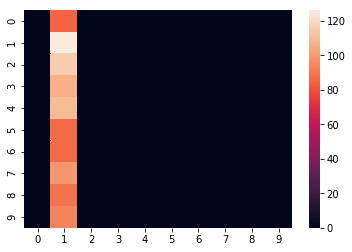

Gamma=0.000100 C=0.100000
Accuracy: 0.675
R squared: 0.3158412230420904
F1 Score: 0.675
Confusion Matrix:


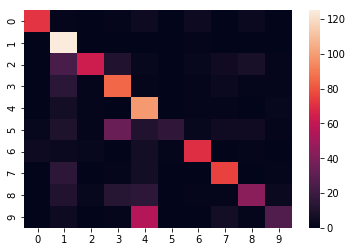

Gamma=0.000100 C=1.000000
Accuracy: 0.884
R squared: 0.7412532106008993
F1 Score: 0.884
Confusion Matrix:


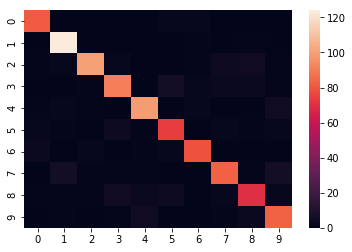

Gamma=0.000100 C=10.000000
Accuracy: 0.914
R squared: 0.8217935781404755
F1 Score: 0.914
Confusion Matrix:


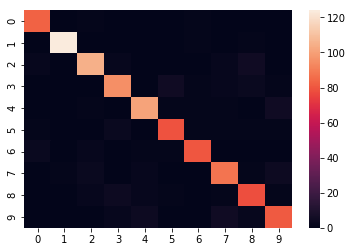

Gamma=0.000100 C=100.000000
Accuracy: 0.92
R squared: 0.8167055117781911
F1 Score: 0.92
Confusion Matrix:


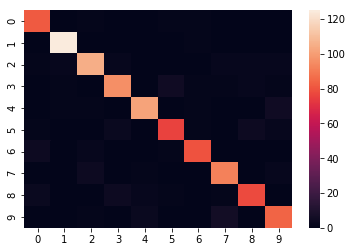

Gamma=0.000010 C=0.010000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


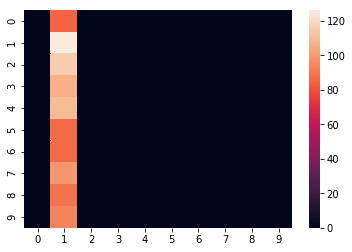

Gamma=0.000010 C=0.100000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


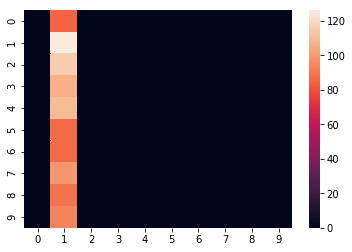

Gamma=0.000010 C=1.000000
Accuracy: 0.706
R squared: 0.3904248299624067
F1 Score: 0.706
Confusion Matrix:


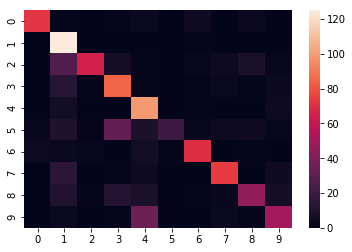

Gamma=0.000010 C=10.000000
Accuracy: 0.882
R squared: 0.7410050122417635
F1 Score: 0.882
Confusion Matrix:


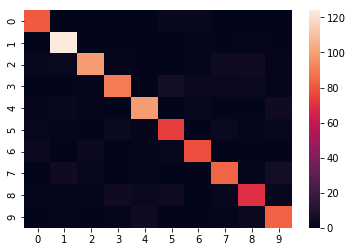

Gamma=0.000010 C=100.000000
Accuracy: 0.906
R squared: 0.8129825363911537
F1 Score: 0.906
Confusion Matrix:


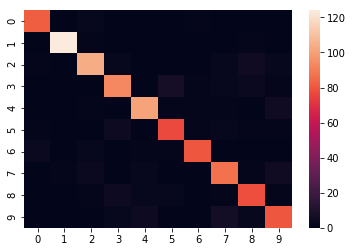

Gamma=0.000001 C=0.010000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


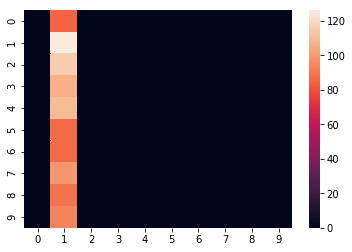

Gamma=0.000001 C=0.100000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


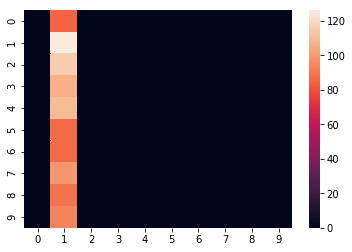

Gamma=0.000001 C=1.000000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


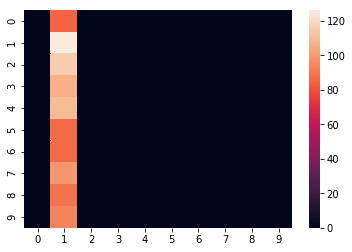

Gamma=0.000001 C=10.000000
Accuracy: 0.706
R squared: 0.3889356398075917
F1 Score: 0.706
Confusion Matrix:


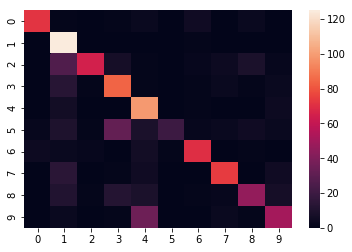

Gamma=0.000001 C=100.000000
Accuracy: 0.88
R squared: 0.7374061360342941
F1 Score: 0.88
Confusion Matrix:


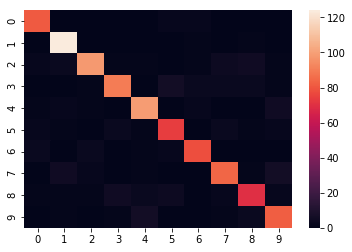

Gamma=0.000000 C=0.010000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


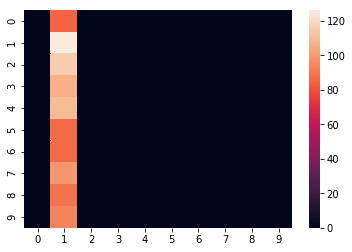

Gamma=0.000000 C=0.100000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


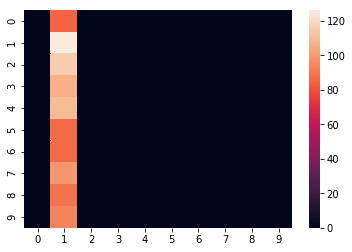

Gamma=0.000000 C=1.000000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


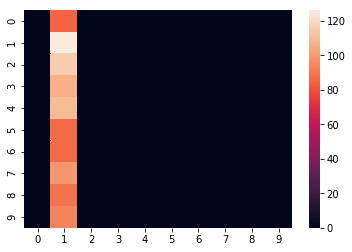

Gamma=0.000000 C=10.000000
Accuracy: 0.126
R squared: -1.3736450075954902
F1 Score: 0.126
Confusion Matrix:


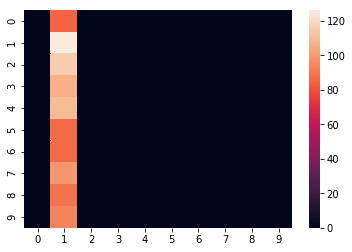

Gamma=0.000000 C=100.000000
Accuracy: 0.707
R squared: 0.39203811929678956
F1 Score: 0.707
Confusion Matrix:


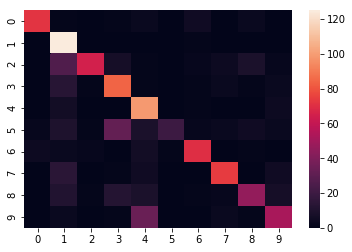

In [23]:
for gamma in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    for C in [0.01,0.1,1,10,100]:
        svm = SVC(C = C, kernel='rbf', gamma=gamma)
        svm.fit(scaler.transform(images_train[:6000]),labels_train[:6000])

        preds = svm.predict(scaler.transform(images_test[:1000]))

        print('Gamma=%f C=%f'%(gamma,C))
        print('Accuracy:',accuracy_score(labels_test[:1000],preds))
        print('R squared:',r2_score(labels_test[:1000],preds))
        print('F1 Score:',f1_score(labels_test[:1000],preds,average='micro'))
        print('Confusion Matrix:')
        sns.heatmap(confusion_matrix(labels_test[:1000],preds))
        plt.show()


Best for Gamma=0.001000 C=100.000000.

Gamma=0.001 C=0.01
Accuracy: 0.8774
R squared: 0.7499641165234288
F1 Score: 0.8774
Confusion Matrix:


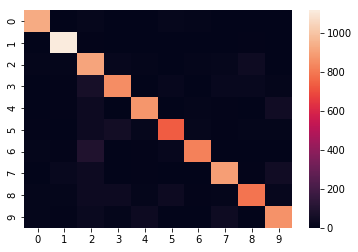

Gamma=0.001 C=0.1
Accuracy: 0.9347
R squared: 0.8686852469254733
F1 Score: 0.9347
Confusion Matrix:


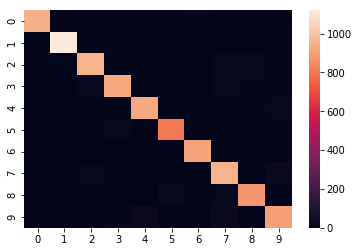

Gamma=0.001 C=1
Accuracy: 0.9657
R squared: 0.9253326973935508
F1 Score: 0.9657
Confusion Matrix:


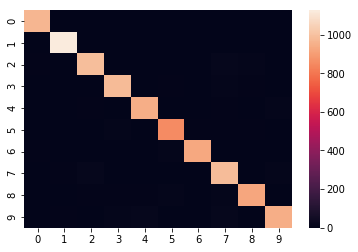

Gamma=0.001 C=10
Accuracy: 0.9732
R squared: 0.9475027206398995
F1 Score: 0.9732
Confusion Matrix:


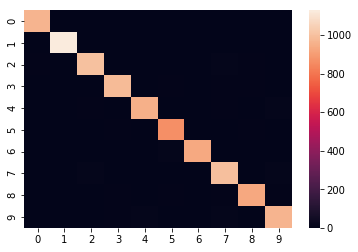

Gamma=0.001 C=100
Accuracy: 0.9719
R squared: 0.9432452175205093
F1 Score: 0.9719
Confusion Matrix:


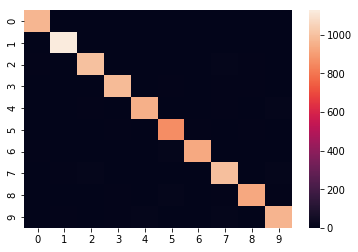

Gamma=0.0001 C=0.01
Accuracy: 0.721
R squared: 0.3442848907186723
F1 Score: 0.721
Confusion Matrix:


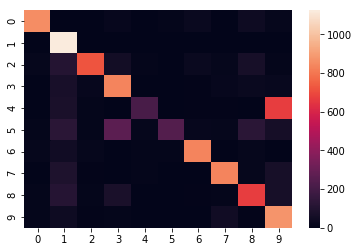

Gamma=0.0001 C=0.1
Accuracy: 0.9092
R squared: 0.8034512355443398
F1 Score: 0.9092
Confusion Matrix:


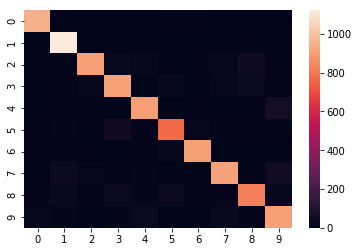

Gamma=0.0001 C=1
Accuracy: 0.9366
R squared: 0.8671706729866426
F1 Score: 0.9366
Confusion Matrix:


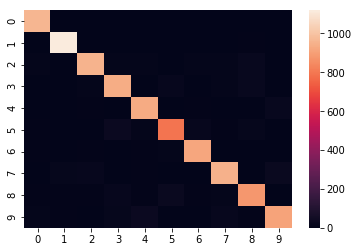

Gamma=0.0001 C=10
Accuracy: 0.9527
R squared: 0.8986547296678479
F1 Score: 0.9526999999999999
Confusion Matrix:


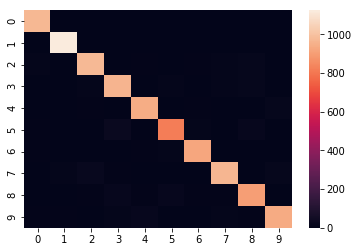

Gamma=0.0001 C=100
Accuracy: 0.9623
R squared: 0.9193101789753658
F1 Score: 0.9623
Confusion Matrix:


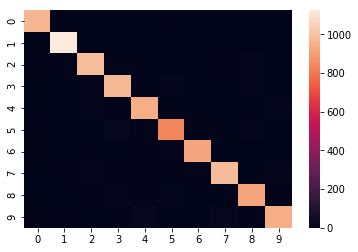

Gamma=1e-05 C=0.01
Accuracy: 0.1135
R squared: -1.4140400460314084
F1 Score: 0.1135
Confusion Matrix:


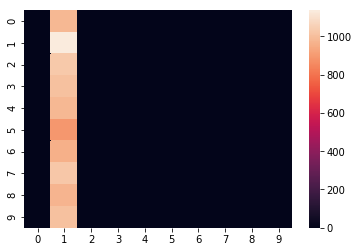

Gamma=1e-05 C=0.1
Accuracy: 0.7369
R squared: 0.3763413847940812
F1 Score: 0.7369000000000001
Confusion Matrix:


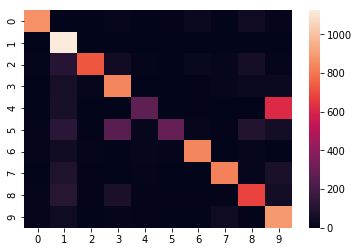

Gamma=1e-05 C=1
Accuracy: 0.9096
R squared: 0.8027237630225392
F1 Score: 0.9096
Confusion Matrix:


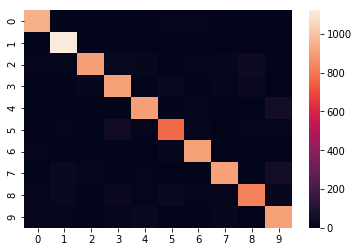

Gamma=1e-05 C=10
Accuracy: 0.936
R squared: 0.8657038021639956
F1 Score: 0.936
Confusion Matrix:


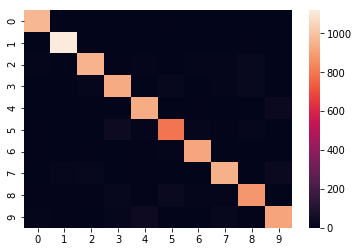

Gamma=1e-05 C=100
Accuracy: 0.9468
R squared: 0.8910460826365566
F1 Score: 0.9468
Confusion Matrix:


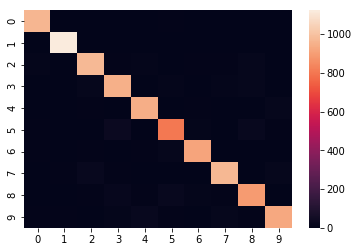

Gamma=1e-06 C=0.01
Accuracy: 0.1135
R squared: -1.4140400460314084
F1 Score: 0.1135
Confusion Matrix:


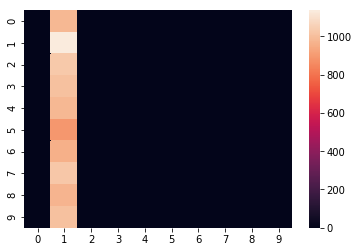

Gamma=1e-06 C=0.1
Accuracy: 0.1135
R squared: -1.4140400460314084
F1 Score: 0.1135
Confusion Matrix:


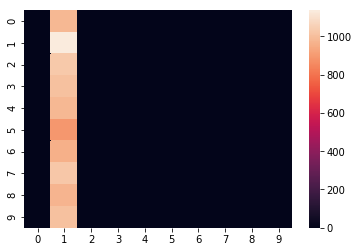

Gamma=1e-06 C=1
Accuracy: 0.7385
R squared: 0.3809089581686651
F1 Score: 0.7385
Confusion Matrix:


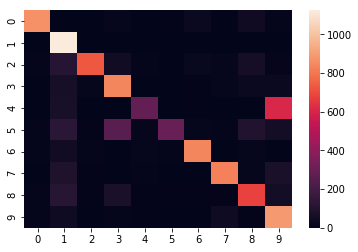

Gamma=1e-06 C=10
Accuracy: 0.9094
R squared: 0.8016981460245909
F1 Score: 0.9094
Confusion Matrix:


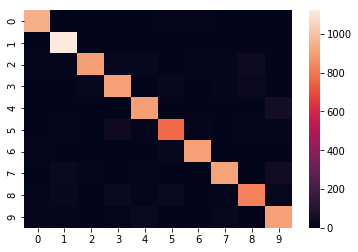

Gamma=1e-06 C=100
Accuracy: 0.9354
R squared: 0.8649405523050573
F1 Score: 0.9354
Confusion Matrix:


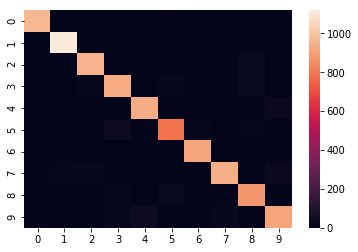

Gamma=1e-07 C=0.01
Accuracy: 0.1135
R squared: -1.4140400460314084
F1 Score: 0.1135
Confusion Matrix:


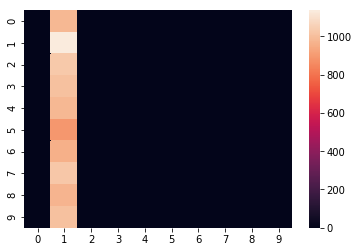

Gamma=1e-07 C=0.1
Accuracy: 0.1135
R squared: -1.4140400460314084
F1 Score: 0.1135
Confusion Matrix:


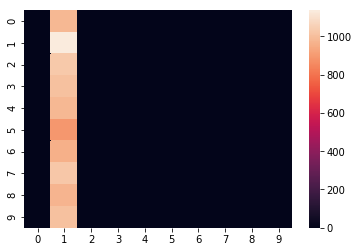

Gamma=1e-07 C=1
Accuracy: 0.1135
R squared: -1.4140400460314084
F1 Score: 0.1135
Confusion Matrix:


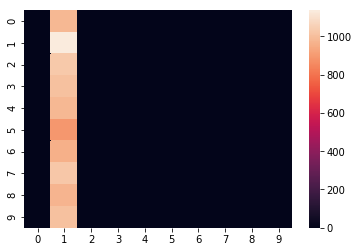

Gamma=1e-07 C=10
Accuracy: 0.7383
R squared: 0.38002645051926776
F1 Score: 0.7383000000000001
Confusion Matrix:


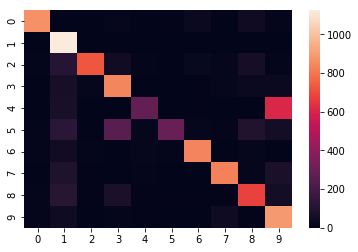

Gamma=1e-07 C=100
Accuracy: 0.9092
R squared: 0.8014000015484432
F1 Score: 0.9092
Confusion Matrix:


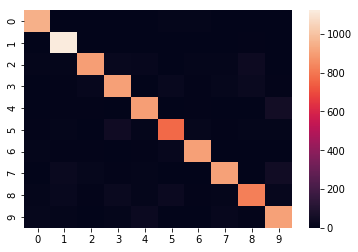

In [24]:
for gamma in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    for C in [0.01,0.1,1,10,100]:
        svm = SVC(C = C, kernel='rbf', gamma=gamma)
        svm.fit(scaler.transform(images_train),labels_train)

        preds = svm.predict(scaler.transform(images_test))

        print('Gamma={} C={}'.format(gamma,C))
        print('Accuracy:',accuracy_score(labels_test,preds))
        print('R squared:',r2_score(labels_test,preds))
        print('F1 Score:',f1_score(labels_test,preds,average='micro'))
        print('Confusion Matrix:')
        sns.heatmap(confusion_matrix(labels_test,preds))
        plt.show()


Kernel: poly
Accuracy: 0.933
R squared: 0.8296118264532542
F1 Score: 0.933
Confusion Matrix:


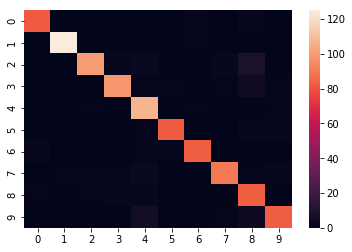

Kernel: linear
Accuracy: 0.89
R squared: 0.7426183015761465
F1 Score: 0.89
Confusion Matrix:


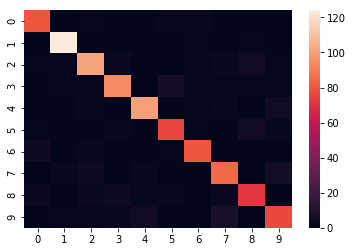

Kernel: sigmoid
Accuracy: 0.861
R squared: 0.7278504992075647
F1 Score: 0.861
Confusion Matrix:


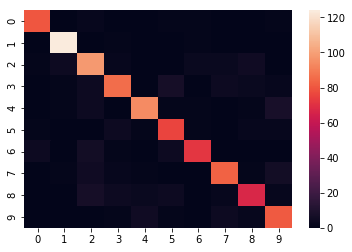

In [25]:
for kernel in ['poly','linear','sigmoid']:
        svm = SVC(C = 10,kernel=kernel)
        svm.fit(scaler.transform(images_train[:6000]),labels_train[:6000])

        preds = svm.predict(scaler.transform(images_test[:1000]))

        print('Kernel: {}'.format(kernel))
        print('Accuracy:',accuracy_score(labels_test[:1000],preds))
        print('R squared:',r2_score(labels_test[:1000],preds))
        print('F1 Score:',f1_score(labels_test[:1000],preds,average='micro'))
        print('Confusion Matrix:')
        sns.heatmap(confusion_matrix(labels_test[:1000],preds))
        plt.show()


Kernel: poly
Accuracy: 0.9763
R squared: 0.9506392005289741
F1 Score: 0.9762999999999998
Confusion Matrix:


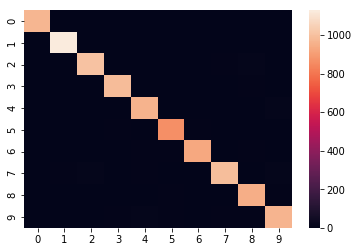

Kernel: linear
Accuracy: 0.9265
R squared: 0.8486976412445264
F1 Score: 0.9265
Confusion Matrix:


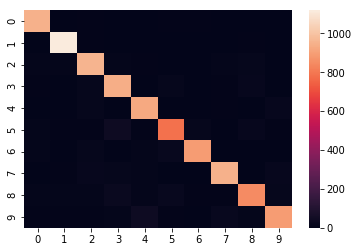

Kernel: sigmoid
Accuracy: 0.8674
R squared: 0.7294517765644617
F1 Score: 0.8674
Confusion Matrix:


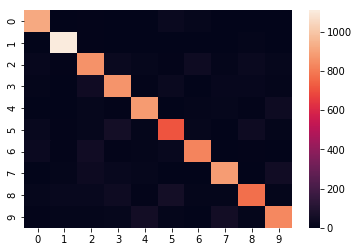

In [26]:
for kernel in ['poly','linear','sigmoid']:
        svm = SVC(C = 10,kernel=kernel)
        svm.fit(scaler.transform(images_train),labels_train)

        preds = svm.predict(scaler.transform(images_test))

        print('Kernel: {}'.format(kernel))
        print('Accuracy:',accuracy_score(labels_test,preds))
        print('R squared:',r2_score(labels_test,preds))
        print('F1 Score:',f1_score(labels_test,preds,average='micro'))
        print('Confusion Matrix:')
        sns.heatmap(confusion_matrix(labels_test,preds))
        plt.show()
